In [1]:
import numpy as np 

H = np.load('Hamiltonian_Example.npy')

In [12]:
e,y = np.linalg.eig(H)
psi = np.transpose(y)

np.sort(e)

array([-3.34084762e+00+0.00000000e+00j, -3.29295138e+00+0.00000000e+00j,
       -2.86387634e+00+0.00000000e+00j, -2.78526086e+00+0.00000000e+00j,
       -1.56155281e+00+0.00000000e+00j, -1.56155281e+00+0.00000000e+00j,
       -1.00000000e+00+0.00000000e+00j, -1.00000000e+00+0.00000000e+00j,
       -1.00000000e+00+0.00000000e+00j, -1.00000000e+00+0.00000000e+00j,
       -5.61552813e-01+0.00000000e+00j, -5.61552813e-01+0.00000000e+00j,
        7.31507328e-16+0.00000000e+00j,  5.07690516e-01+0.00000000e+00j,
        5.23028722e-01+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
        1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
        1.00000000e+00+0.00000000e+00j,  1.00000000e+00-1.27192026e-16j,
        1.00000000e+00+1.27192026e-16j,  1.47697128e+00+0.00000000e+00j,
        1.49230948e+00+0.00000000e+00j,  2.00000000e+00+0.00000000e+00j,
        2.56155281e+00+0.00000000e+00j,  2.56155281e+00+0.00000000e+00j,
        3.00000000e+00+0.00000000e+00j,  3.00000000

In [13]:
order = np.argsort(e)
psi0 = psi[order[0]]

In [14]:
np.dot(np.conjugate(psi0),np.dot(H,psi0))

(-3.3408476172483446+0j)

C:\Users\jsten\Anaconda3\envs\qiskit_25v\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


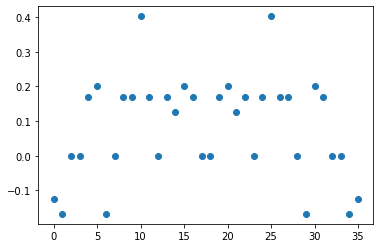

In [17]:
import matplotlib.pyplot as plt

si = [i for i in range(len(psi0))]

plt.scatter(si,psi0)

In [18]:
psi0

array([-1.25795764e-01+0.j, -1.67964002e-01+0.j, -5.30577273e-16+0.j,
       -5.60658926e-16+0.j,  1.67964002e-01+0.j,  2.01103458e-01+0.j,
       -1.67964002e-01+0.j, -6.82785690e-17+0.j,  1.67964002e-01+0.j,
        1.67964002e-01+0.j,  4.02206915e-01+0.j,  1.67964002e-01+0.j,
        3.88797682e-16+0.j,  1.67964002e-01+0.j,  1.25795764e-01+0.j,
        2.01103458e-01+0.j,  1.67964002e-01+0.j, -4.13667999e-16+0.j,
        3.86445875e-16+0.j,  1.67964002e-01+0.j,  2.01103458e-01+0.j,
        1.25795764e-01+0.j,  1.67964002e-01+0.j, -4.03698098e-16+0.j,
        1.67964002e-01+0.j,  4.02206915e-01+0.j,  1.67964002e-01+0.j,
        1.67964002e-01+0.j,  1.96971449e-16+0.j, -1.67964002e-01+0.j,
        2.01103458e-01+0.j,  1.67964002e-01+0.j,  4.92585159e-16+0.j,
        4.84536895e-16+0.j, -1.67964002e-01+0.j, -1.25795764e-01+0.j])

In [19]:
#Creates all states with N fermions and S orbitals
def Generate_States(N,S):
    s = [i for i in range(0,N)]
    psi_l = []
    while s[0] < S-N:
        ### create the state and store it
        psi = 0
        for i in s:
            psi += 2**i
        psi_l.append(psi)
        ###
        ###Update the particle locations
        exit = 0
        i = len(s)-1
        while exit == 0:
            if s[i] < S-len(s)+i:
                s[i] += 1
                for j in range(i+1,len(s)):
                    s[j] = s[j-1]+1
                exit = 1
            else:
                i -= 1
        ###
    ###Create the finale state
    psi = 0
    for i in s:
        psi += 2**i
    psi_l.append(psi)
    ###
    return psi_l

In [28]:
S = 4
states = Generate_States(2,S)

for state in states:
    print(bin(state))

0b11
0b101
0b1001
0b110
0b1010
0b1100


In [40]:
states_full = []
for i in range(0,len(states)):
    for j in range(0,len(states)):
        states_full.append(states[i]*2**S+states[j])
        
group_A = []
group_B = []
group_C = []
group_Ap = []
group_Bp = []
group_D = []

for i,psi_b in enumerate(states_full):
    if -0.168 < psi0[i] < -0.167:
        group_A.append(bin(psi_b))
        #print("A: ", bin(psi_b),psi0[i])
    if -0.126 < psi0[i] < -0.125:
        group_B.append(bin(psi_b))
        #print("B: ", bin(psi_b),psi0[i])
    if -0.001 < psi0[i] < 0.001:
        group_C.append(bin(psi_b))
        #print("C: ", bin(psi_b),psi0[i])
    if 0.125 < psi0[i] < 0.126:
        group_Bp.append(bin(psi_b))
        #print("Bp: ", bin(psi_b),psi0[i])
    if 0.167 < psi0[i] < 0.168:
        group_Ap.append(bin(psi_b))
        #print("Ap: ", bin(psi_b),psi0[i])
    if 0.402 < psi0[i] < 0.403:
        group_D.append(bin(psi_b))
        #print("D: ", bin(psi_b),psi0[i])

In [41]:
group_D

['0b1011010', '0b10100101']

Rule: a state is in group D if both are true:

    1) None of the spin up electrons and spin down electrons are on the same site
    2) None of the electrons with the same spin are on neighboring sites

In [50]:
print(group_B)

['0b110011', '0b11001100']


Rule: a state is in group B if both are true:

    1) None of the spin up electrons and spin down electrons are on the same site
    2) Both of the electrons with the same spin are on neigboring sites

In [51]:
print(group_Bp)

['0b10011001', '0b1100110']


Rule: a state is in group Bp if both are true:

    1) Both of the spin up electrons and spin down electrons are on the same site
    2) Both of the electrons with the same spin are on neigboring sites

In [52]:
print(group_A)
print(group_Ap)

['0b110101', '0b1010011', '0b10101100', '0b11001010']


Rule: a state is in group A or Ap if both are true:

    1) Only one of either spin up electrons or spin down electrons are on the same site
    2) Only one of either electrons with the same spin are on neigboring sites
    
The difference seems to be the order of the electrons:

    a) If the first electron of spin up matches the second electron of spin down (or visa-versa) then group Ap
    b) If the electrons neigbor each other accross the boundary of the wire then group Ap
    c) If the electrons neibor each other in the center of the wire then group Ap
    d) All else is group A

In [54]:
print(group_C)

['0b111001', '0b110110', '0b1010101', '0b10010011', '0b10011100', '0b1100011', '0b1101100', '0b10101010', '0b11001001', '0b11000110']


There are two ways to get into group C

Rule 1: a state is in group C if both are true:

    1) Only one of either spin up electrons or spin down electrons are on the same site
    2) Both of the electrons with the same spin are on neigboring sites
    
Rule 2: a state is in group C if both are true:

    1) Both of the spin up electrons and spin down electrons are on the same site
    2) None of the electrons with the same spin are on neighboring sites



In [80]:
chart = np.array([['Electrions from different spins touching', 'Both', 'One', 'None'],
          ['Electrons from the same spin neigboring',' ', ' ', ' '],
          ['Both','Bp','C','B'],
          ['One','N/A','A,Ap','N/A'],
          ['None','C','N/A','D']])

In [81]:
import pandas as pd

pd.DataFrame(chart)

,0,1,2,3
0,Electrions from different spins touching,Both,One,None
1,Electrons from the same spin neigboring,,,
2,Both,Bp,C,B
3,One,N/A,"A,Ap",N/A
4,None,C,N/A,D


## From H_Complete

In [108]:
from qiskit.opflow import (I, X, Y, Z)
from qiskit.opflow.primitive_ops import MatrixOp

# Function to add elements to a block so that it fits onto qubits
def complete_diagonal(b11):
    size = 2**np.ceil(np.log2(len(b11)))
    for v in b11:
        while len(v) < size:
            v.append(0.0)
    while len(b11) < size:
        i = len(b11)
        vnew = [0.0 for i in range(0,8)]
        vnew[i] = 10
        b11.append(vnew)
    return b11

def complete_off_diagonal(b11):
    size = 2**np.ceil(np.log2(len(b11)))
    for v in b11:
        while len(v) < size:
            v.append(0.0)
    while len(b11) < size:
        i = len(b11)
        vnew = [0.0 for i in range(0,8)]
        b11.append(vnew)
    return b11



In [109]:
import math
N = 4
S = 2
bL = math.comb(4,2)

blocks = {}
for bi in range(bL):
    for bj in range(bi,bL):
        bij = [[H[i + bL*bi][j + bL*bj] for j in range(0,bL)] for i in range(0,bL)]
        if np.amax(np.abs(bij)) > 10**(-5):
            if bi == bj:
                bij = complete_diagonal(bij)
            else:
                bij = complete_off_diagonal(bij)
            bij_pauli = MatrixOp(bij).to_pauli_op()
            blocks[str(bi) + ',' + str(bj)] = bij_pauli
        

In [110]:
keys = list(blocks.keys())

size = int(2**np.ceil(np.log2(bL)))
H_complete = np.array([[0 for i in range(size**2)] for j in range(size**2)])

for bi in range(bL):
    for bj in range(bi,bL):
        key = str(bi) + ',' + str(bj)
        if key  in keys:
            block = blocks[key].to_matrix()
        else:
            block = np.array([[0.0 for i in range(size)] for j in range(size)])
        for i in range(size):
            for j in range(size):
                H_complete[i + bi*size, j + bj*size] = block[i,j]
                H_complete[i + bj*size, j + bi*size] = block[j,i]

<ipython-input-110-ce06f5abc6d5>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  H_complete[i + bi*size, j + bj*size] = block[i,j]
<ipython-input-110-ce06f5abc6d5>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  H_complete[i + bj*size, j + bi*size] = block[j,i]


In [113]:
e,y = np.linalg.eig(H_complete)
psi = np.transpose(y)

order = np.argsort(e)
psi0_c = psi[order[0]]

np.dot(np.conjugate(psi0_c),np.dot(H_complete,psi0_c))

-3.340847617248346

## Anzats space

In [87]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
from qiskit import quantum_info as qi

In [88]:
Q = 3
def Ui(cir_i,phi_i):  
    
    for q in range(0,Q):
        cir_i.ry(phi_i[q],q)
    for q in range(0,Q,4):
        cir_i.cx(q,q+1)
        if q + 3 < Q:
            cir_i.cx(q+3,q+2)
    for q in range(1,Q,4):
        cir_i.cx(q,q+1)
        if q + 3 < Q:
            cir_i.cx(q+3,q+2)
    
    return cir_i

Statevector([-0.00255534+0.j,  0.00122983+0.j, -0.25700727+0.j,
              0.69196896+0.j,  0.60787936+0.j, -0.29255979+0.j,
              0.00108038+0.j, -0.00290883+0.j],
            dims=(2, 2, 2))


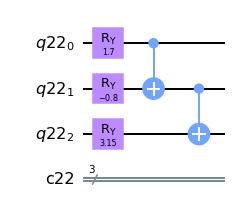

In [124]:
qr = QuantumRegister(Q)
cr = ClassicalRegister(Q)
cir_i = QuantumCircuit(qr , cr)
tst = Ui(cir_i,[1.7,-0.8,3.15])

print(qi.Statevector.from_instruction(cir_i))

tst.draw(output = 'mpl')

In [116]:
psi0_c

array([-1.25795764e-01, -1.67964002e-01, -1.06324026e-16, -6.78869764e-17,
        1.67964002e-01,  2.01103458e-01,  0.00000000e+00,  0.00000000e+00,
       -1.67964002e-01,  2.06340312e-15,  1.67964002e-01,  1.67964002e-01,
        4.02206915e-01,  1.67964002e-01,  0.00000000e+00,  0.00000000e+00,
        7.74532275e-17,  1.67964002e-01,  1.25795764e-01,  2.01103458e-01,
        1.67964002e-01, -8.59006072e-17,  0.00000000e+00,  0.00000000e+00,
        7.83166450e-17,  1.67964002e-01,  2.01103458e-01,  1.25795764e-01,
        1.67964002e-01, -8.89953560e-17,  0.00000000e+00,  0.00000000e+00,
        1.67964002e-01,  4.02206915e-01,  1.67964002e-01,  1.67964002e-01,
        1.96925173e-15, -1.67964002e-01,  0.00000000e+00,  0.00000000e+00,
        2.01103458e-01,  1.67964002e-01,  8.61514686e-17,  6.58767881e-17,
       -1.67964002e-01, -1.25795764e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

An issue which is clear right away is that we need the last two terms to be zero in every section which is difficult (impossible?) to achieve with the Anzatz

In [151]:
import pickle

T=1
file_to_read = open("VQE_Gunlycke_T"+str(T)+".pickle", "rb")

loaded_object = pickle.load(file_to_read)

Statevector([-0.02190586+0.j, -0.01943355+0.j, -0.49240658+0.j,
             -0.50495032+0.j, -0.52940788+0.j, -0.46965841+0.j,
             -0.02037482+0.j, -0.02089386+0.j],
            dims=(2, 2, 2))


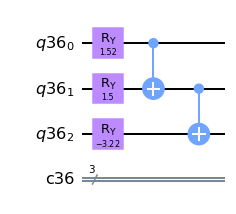

In [152]:

qr = QuantumRegister(Q)
cr = ClassicalRegister(Q)
cir_i = QuantumCircuit(qr , cr)
tst = Ui(cir_i,loaded_object[499]['phi'][0,0])

print(qi.Statevector.from_instruction(cir_i))

tst.draw(output = 'mpl')

In [153]:
pwd

'C:\\Users\\jsten\\IBMQ\\Hubbard_symmetries'